In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from time import time

In [2]:
# 设置鸢尾花特征类别:
iris_feature='花萼长度','花萼宽度','花瓣长度','花瓣宽度'
# 设置文件路径:
path='iris.data'
# 使用pandas的read_csv功能读取数据:
data=pd.read_csv(path,header=None)
# 用pd.Categorical( list ).codes功能得到原始数据的对应的序号列表，通过这样的处理可以将类别信息转化成数值信息:
x,y=data[[0,1]],pd.Categorical(data[4]).codes
# 将数据分为训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.4)

In [3]:
print(x_train)

       0    1
11   4.8  3.4
113  5.7  2.5
123  6.3  2.7
12   4.8  3.0
2    4.7  3.2
..   ...  ...
133  6.3  2.8
137  6.4  3.1
72   6.3  2.5
140  6.7  3.1
37   4.9  3.1

[90 rows x 2 columns]


In [4]:
# 使用sklearn.svm.SVC构建分类器
svm_clf=svm.SVC(C=3,kernel='linear')
# 样例及主要参数
# svm_clf = svm.SVC(C=10, gamma=1, kernel='rbf', decision_function_shape='ovo')
print('网格搜索法开始......')
t = time()
clf = svm_clf

网格搜索法开始......


In [5]:
# clf = GridSearchCV(svm_clf, param_grid={'gamma':np.logspace(-2, 2, 10), 'C':np.logspace(-2, 2, 10)}, cv=3)
clf.fit(x_train, y_train.ravel())

# 打印分类时长
t_end = time()
print('学习耗时：%d秒' % (t_end - t))

学习耗时：0秒


In [6]:
# 打印('最优参数：')
clf.coef_

array([[-2.50007025,  2.50040218],
       [-2.22119453,  1.58523557],
       [-0.90947309, -2.00086332]])

In [7]:
# 打印精度、训练集准确率、测试集准确率
print(clf.score(x_train,y_train))
print('训练集的准确度：',accuracy_score(y_train,clf.predict(x_train)))

0.7888888888888889
训练集的准确度： 0.7888888888888889


In [8]:
print(clf.score(x_test,y_test))
print("测试集的准确度：",accuracy_score(y_test,clf.predict(x_test)))

0.7833333333333333
测试集的准确度： 0.7833333333333333


In [9]:
# 决策函数
print(x_train[:5])

       0    1
11   4.8  3.4
113  5.7  2.5
123  6.3  2.7
12   4.8  3.0
2    4.7  3.2


In [10]:
print('decision_function:\n', clf.decision_function(x_train))

decision_function:
 [[ 2.27077043  0.77466667 -0.23050192]
 [-0.26084184  2.25751125  1.0560141 ]
 [-0.28293421  2.25843306  1.22796515]
 [ 2.24308998  0.92588576 -0.2355186 ]
 [ 2.26643883  0.80879936 -0.24170145]
 [-0.28069428  1.23581332  2.24817619]
 [ 2.28018898  0.76457517 -0.24714914]
 [-0.25832462  1.21350955  2.20811726]
 [-0.27289547  1.20094518  2.249947  ]
 [-0.28479994  1.2318958   2.26058535]
 [-0.23449614  2.22389578  1.08207816]
 [-0.27824598  1.19362022  2.2618816 ]
 [-0.24940836  1.20624284  2.19142888]
 [ 2.2732283  -0.2577432   0.82271427]
 [-0.2872948   2.27977562  1.1680301 ]
 [-0.28016055  1.24346593  2.23969255]
 [-0.28069428  1.23581332  2.24817619]
 [-0.17539161  2.25364746  0.77515212]
 [-0.25325305  1.14281388  2.23566431]
 [-0.2421088   2.25159667  0.90072452]
 [ 2.24374936 -0.23761503  0.93581753]
 [ 2.24150985  0.87804111 -0.2241573 ]
 [ 2.28041834 -0.27382086  0.86293615]
 [-0.27824598  1.19362022  2.2618816 ]
 [ 2.27361996  0.84008337 -0.26180365]
 [-0.

In [11]:
print('\npredict:\n', clf.predict(x_train))


predict:
 [0 1 1 0 0 2 0 2 2 2 1 2 2 0 1 2 2 1 2 1 0 0 0 2 0 1 1 2 0 0 1 0 2 2 2 2 1
 2 2 1 0 1 0 1 2 0 2 0 0 2 1 2 0 0 2 0 1 0 2 1 0 2 0 1 0 1 1 0 0 1 0 2 2 0
 2 1 1 2 1 0 0 1 1 2 1 1 2 1 2 0]


In [12]:
# 画图
x1_min,x2_min=x.min()
x1_max,x2_max=x.max()
# 生成网格采样点
x1,x2=np.mgrid[x1_min:x1_max:300j,x2_min:x2_max:300j]
# 设置测试点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  
# 预测分类值
grid_hat=clf.predict(grid_test)
# 使之与输入的形状相同
grid_hat=grid_hat.reshape(x1.shape)
# 设置中文字体显示
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

<ipython-input-16-53ab735e4939>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x1,x2,grid_hat,cmap=cm_light)


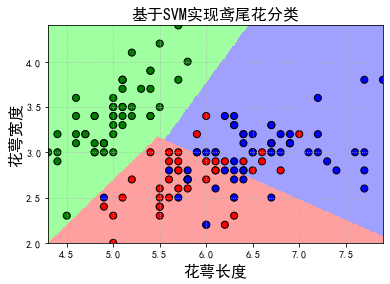

In [16]:
# 设置绘图参数包括颜色、标题、横纵坐标范围、横纵坐标标签、设置网格
cm_light=mpl.colors.ListedColormap(['#A0FFA0','#FFA0A0','#A0A0FF'])
cm_dark=mpl.colors.ListedColormap(['g','r','b'])
plt.figure(facecolor='w')
plt.pcolormesh(x1,x2,grid_hat,cmap=cm_light)
plt.scatter(x[0],x[1],c=y,edgecolors='k',s=50,cmap=cm_dark)#样本
plt.scatter(x_test[0],x_test[1],s=120,facecolor='none',zorder=10)
plt.xlabel(iris_feature[0],fontsize=16)
plt.ylabel(iris_feature[1],fontsize=16)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.title('基于SVM实现鸢尾花分类',fontsize=16)
plt.grid(b=True,ls=':')
plt.show()